In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

### Homework 3.1.1 - Fourier Series

A periodic function with a period of $T=2$ can be decomposed into a Fourier series with the coefficients below:

$$
{\displaystyle {\begin{aligned}a_{0}= {\frac {2}{3}}\\a_{n}= {\frac {4}{\pi ^{2}n^{2}}}\\b_{n}= 0\\\end{aligned}}}
$$

$$
{\displaystyle f(t)={\frac {a_{0}}{2}}+\sum _{n=1}^{N}\left(a_{n}\cos \left({\tfrac {2\pi }{T}}nt\right)+b_{n}\sin \left({\tfrac {2\pi }{T}}nt\right)\right)}
$$

Use sufficiently large number of $N$ to reconstruct the periodict function $f(x)$ by ploting the graph for $-8 < t < 8$.


So if $b_n = 0$ then the second term of the summation just becomes 0


Ooohh, nice 555

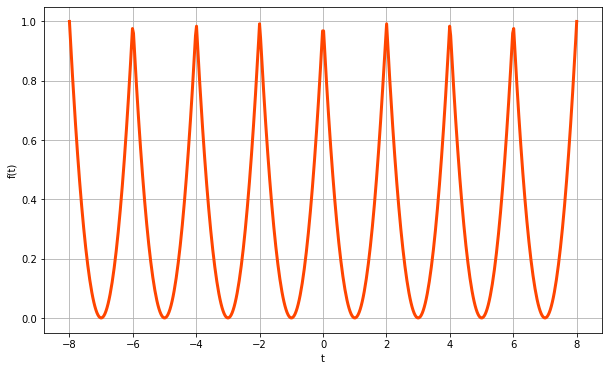

In [17]:
# Define a_0, b_n, and T
a_0 = 2/3
b_n = 0
T = 2

# Define t
t = np.linspace(-8,8,500)

# Define a_n
def a_n(n):
    return 4/((np.pi**2)*(n**2))

# Define the function 
def t_f(t):
    res = 0 
    for n in range(1,5000):
        res += (a_n(n)*np.cos(2*np.pi*n*t/T))
    res += a_0/2
    return res

plt.figure(figsize = (10,6))
plt.grid()
plt.xlabel('t')
plt.ylabel('f(t)')
plt.plot(t, t_f(t), color = 'orangered', linewidth = 3)

___
### Homework 3.1.2

A function $f(x)$ is given by the code and is shown below. Given that the function is periodict function between $-4 < x < 4$, find the first 100 coefficients of the Fourier series and use that coefficients to reconstruct the signal for $-16 < x < 16$.

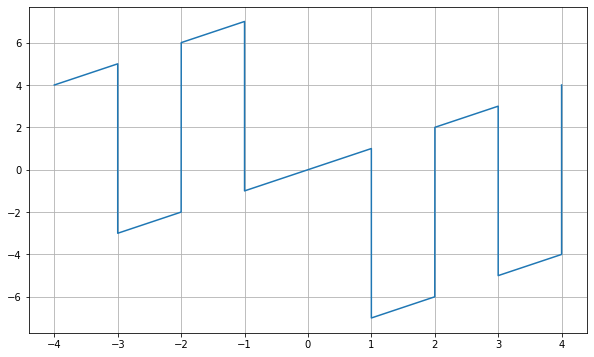

In [5]:
def f(x):
    if (x > 4) or (x < -4):
        raise Exception("Out of bound")
    elif (-4 <= x < -3) or (-2 <= x < -1):
        return x + 8
    elif (1 <= x < 2) or (3 <= x < 4):
        return x - 8
    else:
        return x

x = np.linspace(-4,4,100000)
y = [f(e) for e in x]
plt.figure(figsize = (10,6))
plt.plot(x, y)
plt.grid()
plt.show()

$$ f(x) = \frac{a_0}{2} + \sum_{N=1}^N\Big[a_n \cos\frac{n\pi x}{L} + b_n\sin\frac{n \pi x}{L}\Big]$$

$$ a_0 = \frac{1}{T} \int_{-T}^T f(x) dx $$

$$a_n = \frac{1}{T} \int_{-T}^T f(x)\cos\frac{n \pi x}{L} dx$$



$$ b_n = \frac{1}{T} \int_{-T}^T f(x) \sin\frac{n\pi x}{L} dx$$

In [132]:
T = 4 

# Define a_0, a_n and b_n
def a_0(x):
    return f(x)

def a_n(x, n):
    return f(x) * np.cos(n*np.pi*x / T)

def b_n(x, n):
    return f(x) * np.sin(n*np.pi*x / T)

# Perform the integration to get the coeffs 
coeff_a0 = (1/T) * quad(a_0, -4, 4)[0]
coeff_an = [(1/T) * quad(a_n, -4, 4, args = (n))[0] for n in range(100)]
coeff_bn = [(1/T) * quad(b_n, -4, 4, args = (n))[0] for n in range(100)]

# Construct the function 
def Fourier(x, coeff_a0, coeff_an, coeff_bn, N):
    answer = coeff_a0
    for n in range(N):
        answer += coeff_an[n]*np.cos(n*np.pi*x / T) + coeff_bn[n]*np.sin(n*np.pi*x / T)
#         print(coeff_bn[n])
#         print(x)
#         print(answer)
    return answer
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  app.launch_new_instance()


Text(0, 0.5, 'Idk what this axis is too')

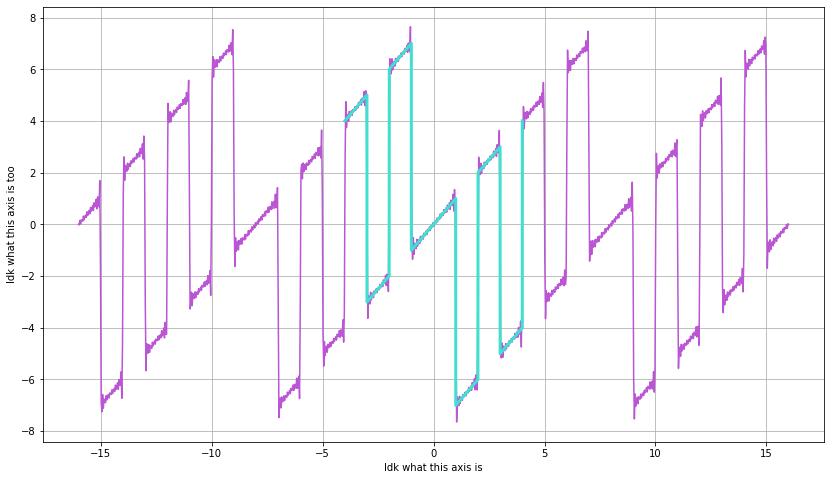

In [146]:
fourier_x = np.linspace(-16, 16, 1000)
# print(fourier_x)
fourier_y = [Fourier(x, coeff_a0, coeff_an, coeff_bn, 100) for x in fourier_x]
# print(fourier_y[0])
plt.figure(figsize = (14,8))
plt.grid()
plt.plot(fourier_x, fourier_y, color = 'mediumorchid');
plt.plot(x, y, linewidth = 3, color = 'turquoise')
plt.xlabel('Idk what this axis is')
plt.ylabel('Idk what this axis is too')